In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Checking lat-lon from 'raw' files
dpath = '/data/pstar_akeake/projects/rpdmoc/cruise_data/dy204/mcruise/data/nav/'  # <<< These files 
#ds = xr.open_dataset(dpath+'bestnav_dy204.nc').squeeze()
dsp = xr.open_dataset(dpath+'posmv_dy204_all_raw.nc').squeeze()
dsp = dsp.set_coords('time')

dsc = xr.open_dataset(dpath+'cnav_dy204_all_raw.nc').squeeze()
dsc = dsc.set_coords('time')

dsf = xr.open_dataset(dpath+'fugro_dy204_all_raw.nc').squeeze()
dsf = dsf.set_coords('time')

#dpath = '/mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/Raw/'  # <<< These files look to be ~2 second average and truncated at some point

#files = os.listdir(dpath)
#files



#ds = xr.open_dataset(dpath+'metocean-DY204-cnav_gngga-raw-20260201-000000.nc').squeeze()


In [144]:
dsc

<xarray.Dataset> Size: 55MB
Dimensions:       (nrows1: 624539)
Coordinates:
    time          (nrows1) datetime64[ns] 5MB ...
Dimensions without coordinates: nrows1
Data variables:
    pad_variable  float64 8B ...
    utctime       (nrows1) float64 5MB ...
    latitude      (nrows1) float64 5MB ...
    longitude     (nrows1) float64 5MB ...
    altitude      (nrows1) float64 5MB ...
    headingtrue   (nrows1) float64 5MB ...
    coursetrue    (nrows1) float64 5MB ...
    heading       (nrows1) float64 5MB ...
    roll          (nrows1) float64 5MB ...
    pitch         (nrows1) float64 5MB ...
    heave         (nrows1) float64 5MB ...
Attributes: (12/20)
    mstar_string:              mstar_5106cb37 (last commit)
    openflag:                  R
    date_file_updated:         [2.026e+03 2.000e+00 9.000e+00 9.000e+00 3.300...
    mstar_time_origin:         [1.95e+03 1.00e+00 1.00e+00 0.00e+00 0.00e+00 ...
    data_time_origin:          []
    time_convention:           date_file_updated and data_time_origin are 6-e...
    ...                        ...
    instrument_depth_metres:   -999.0
    latitude:                  -999.0
    longitude:                 -999.0
    mstar_site:                dy204_atsea
    comment_delimiter_string:   \n 
    comment:                    \n  \n Variables written from rvdas to mstar ...

In [12]:
# Read RVDAS processed underway data
# This is the python processed data, 5 minute averaged, updated daily
# Code looks controllable/editable to update more frequently and with shorter averages, but not much documentation

dpath = '/mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/'

# Seems to be some conflicts when merging data from multiple files - can't see why at the moment... maybe the way the time coordinate is written?
ds = xr.open_mfdataset(dpath+'metocean_20260*.nc',compat='no_conflicts',coords='different', join='outer') #, drop_variables=dodgy_vars)

ds

getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260201-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260202-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260203-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260204-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260205-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260206-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCEAN/metocean_20260207-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/METOCE

<xarray.Dataset> Size: 4MB
Dimensions:                                     (time: 2370)
Coordinates:
  * time                                        (time) datetime64[ns] 19kB 20...
Data variables: (12/202)
    utctime-cnav_gngga                          (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    latitude-cnav_gngga                         (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    longitude-cnav_gngga                        (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    ggaqual-cnav_gngga                          (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    numsat-cnav_gngga                           (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    hdop-cnav_gngga                             (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    ...                                          ...
    temph-sbe45_nanan                           (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    conductivity-sbe45_nanan                    (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    tempr-sbe45_nanan                           (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    salinity-sbe45_nanan                        (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    soundvelocity-sbe45_nanan                   (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
    tempdk-sbe38dk_sbe38                        (time) float64 19kB dask.array<chunksize=(288,), meta=np.ndarray>
Attributes: (12/31)
    Deployment_id:             /deployments/
    title:                     Underway observations from RRS Discovery navig...
    Conventions:               CF-1.8 SeaDataNet-1.0 ACDD-1.3 IOcean-1.0 SAMOS
    source:                    Underway observations from RRS Discovery navig...
    history:                   last_run: 2026-02-02 00:22:27.580146
    references:                www.bodc.co.uk;https://github.com/I-Ocean/netc...
    ...                        ...
    IMO:                       9588029
    facility:                  National Oceanography Centre, Southampton
    data_provider:             RVDAS
    contact_info:              www.noc.ac.uk
    contact_email:             nocs_nmfss_shipsys@noc.ac.uk
    lastTime:                  2026-02-01T00:00:00Z-2026-02-02T00:00:00Z

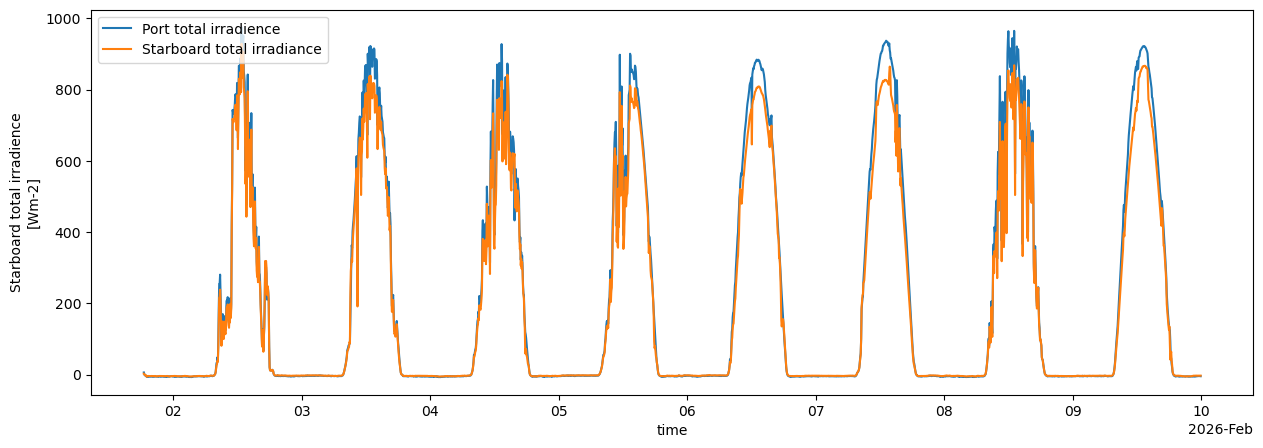

In [13]:
plt.figure(figsize=[15,5])
ds['ptir-nudamlgt_sflgt'].plot(label="Port total irradience");
ds['stir-nudamlgt_sflgt'].plot(label="Starboard total irradiance");
plt.legend();

fig.savefig(fname='DY204_lat_lon_comparison.pdf', format='pdf')
fig.savefig(fname='DY204_lat_lon_comparison.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)

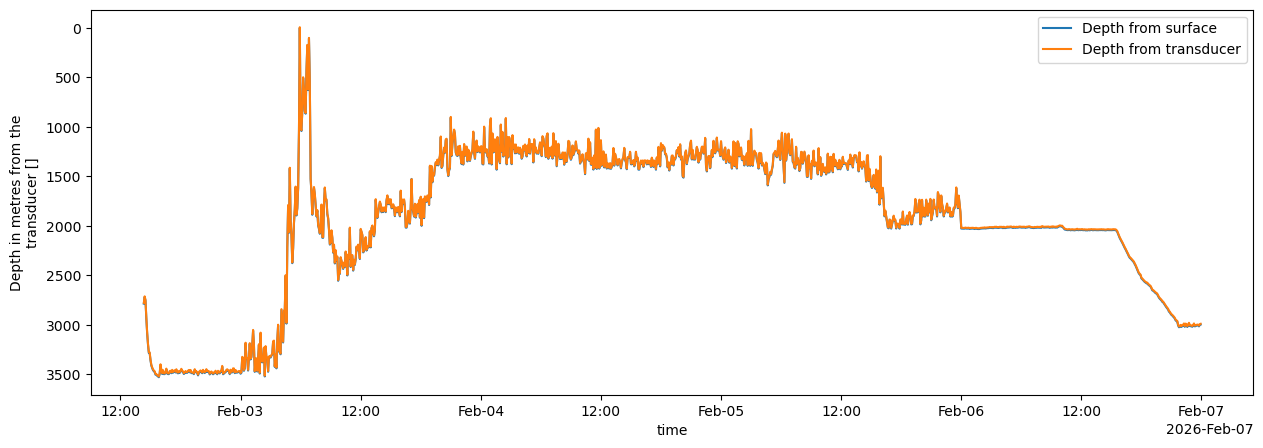

In [33]:
plt.figure(figsize=[15,5])
ds['waterdepthmetrefromsurface-ea640_sddbs'].plot(yincrease=False, label="Depth from surface");
ds['waterdepthmetretransducer-ea640_sddpt'].plot(yincrease=False, label="Depth from transducer");
plt.legend();

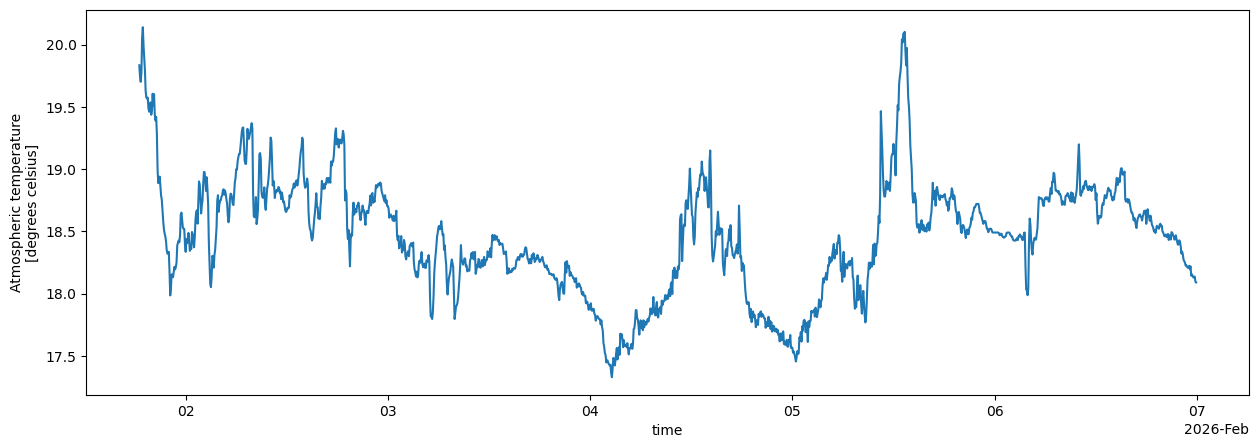

In [36]:
plt.figure(figsize=[15,5])
ds['airtemp-nudammet_sfmet'].plot();

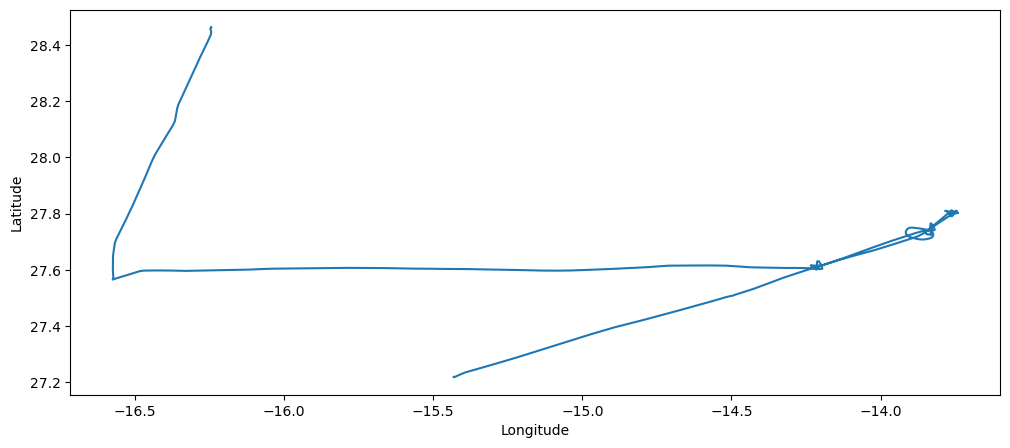

In [31]:
plt.figure(figsize=[12,5])
plt.plot(ds['longitude-posmv_gprmc'],ds['latitude-posmv_gprmc']);
plt.xlabel("Longitude"); plt.ylabel("Latitude"); 

### posmv == primary gps

SBE38 - inlet temperature is variable 'tempr-sbe45_nanan'

In [150]:
dsp

<xarray.Dataset> Size: 55MB
Dimensions:       (nrows1: 624539)
Coordinates:
    time          (nrows1) datetime64[ns] 5MB ...
Dimensions without coordinates: nrows1
Data variables:
    pad_variable  float64 8B ...
    utctime       (nrows1) float64 5MB ...
    latitude      (nrows1) float64 5MB ...
    longitude     (nrows1) float64 5MB ...
    altitude      (nrows1) float64 5MB ...
    headingtrue   (nrows1) float64 5MB ...
    coursetrue    (nrows1) float64 5MB ...
    heading       (nrows1) float64 5MB ...
    roll          (nrows1) float64 5MB ...
    pitch         (nrows1) float64 5MB ...
    heave         (nrows1) float64 5MB ...
Attributes: (12/20)
    mstar_string:              mstar_5106cb37 (last commit)
    openflag:                  R
    date_file_updated:         [2.026e+03 2.000e+00 9.000e+00 9.000e+00 3.300...
    mstar_time_origin:         [1.95e+03 1.00e+00 1.00e+00 0.00e+00 0.00e+00 ...
    data_time_origin:          []
    time_convention:           date_file_updated and data_time_origin are 6-e...
    ...                        ...
    instrument_depth_metres:   -999.0
    latitude:                  -999.0
    longitude:                 -999.0
    mstar_site:                dy204_atsea
    comment_delimiter_string:   \n 
    comment:                    \n  \n Variables written from rvdas to mstar ...

13.80054275826777
0.8200274339373326
14.500801988284227


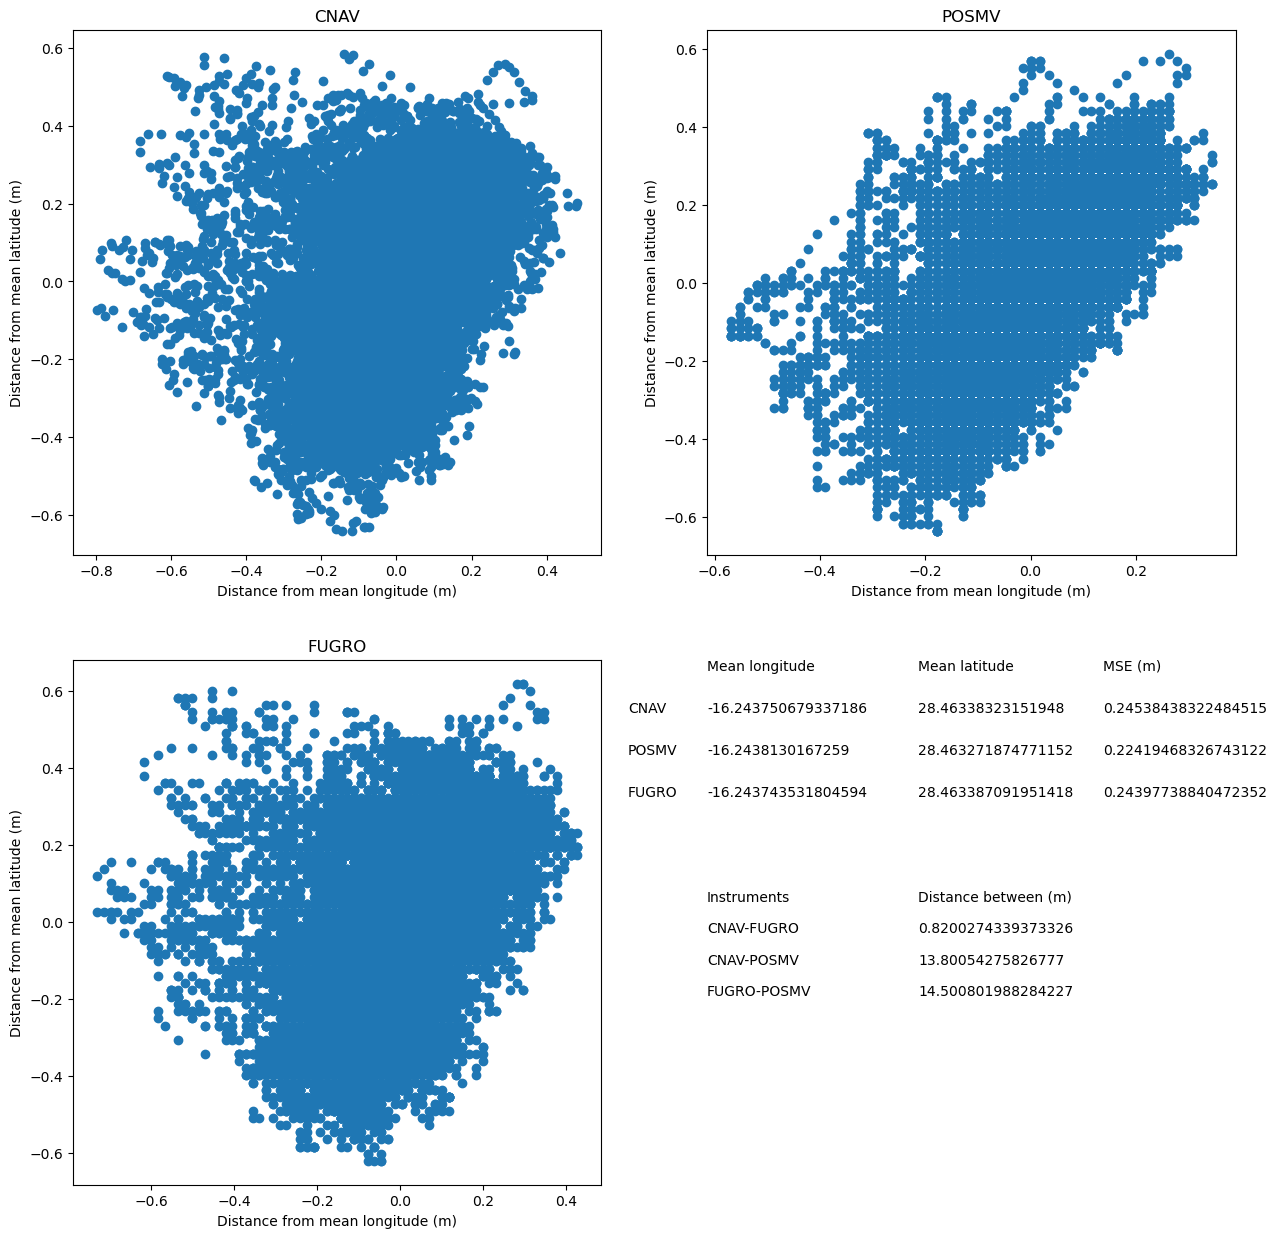

In [10]:
def dd_to_m(lat_mean,lon_anom,lat_anom):

    r = 6370000.
    dlat = 2. * np.pi * r / 360.
    dlon = dlat * np.cos(np.radians(lat_mean))

    lon_anom_m = lon_anom * dlon
    lat_anom_m = lat_anom * dlat
    
    return lon_anom_m, lat_anom_m

def dd_to_m2(lat_mean,lon_anom,lat_anom):
    lon_anom_m = lon_anom * (40075000. * np.cos(np.radians(lat_mean)) / 360.);
    lat_anom_m = lat_anom * 111320.;
    return lon_anom_m, lat_anom_m

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r * 1000


# Extract period whilst in dock    
nt = 17000

cnav_lon_init,cnav_lat_init  = dsc['longitude'][:nt],dsc['latitude'][:nt]
pnav_lon_init,pnav_lat_init  = dsp['longitude'][:nt],dsp['latitude'][:nt]
fnav_lon_init,fnav_lat_init  = dsf['longitude'][:nt],dsf['latitude'][:nt]

# Calculate distances between mean positions 
cp_distances = haversine_distance(cnav_lat_init.mean(), cnav_lon_init.mean(), pnav_lat_init.mean(), pnav_lon_init.mean())
cf_distances = haversine_distance(cnav_lat_init.mean(), cnav_lon_init.mean(), fnav_lat_init.mean(), fnav_lon_init.mean())
fp_distances = haversine_distance(fnav_lat_init.mean(), fnav_lon_init.mean(), pnav_lat_init.mean(), pnav_lon_init.mean())

#print(cp_distances.values)
#print(cf_distances.values)
#print(fp_distances.values)

# Calculate anomalies
cnav_lon_anom = cnav_lon_init - cnav_lon_init.mean()
cnav_lat_anom = cnav_lat_init - cnav_lat_init.mean()

pnav_lon_anom = pnav_lon_init - pnav_lon_init.mean()
pnav_lat_anom = pnav_lat_init - pnav_lat_init.mean()

fnav_lon_anom = fnav_lon_init - fnav_lon_init.mean()
fnav_lat_anom = fnav_lat_init - fnav_lat_init.mean()

# Compute anomalies in m
cnav_lon_anom_m, cnav_lat_anom_m = dd_to_m(cnav_lat_init.mean(),cnav_lon_anom,cnav_lat_anom)
pnav_lon_anom_m, pnav_lat_anom_m = dd_to_m(pnav_lat_init.mean(),pnav_lon_anom,pnav_lat_anom)
fnav_lon_anom_m, fnav_lat_anom_m = dd_to_m(fnav_lat_init.mean(),fnav_lon_anom,fnav_lat_anom)

# Plot lat/lon comparison
fig, axs = plt.subplots(2,2, figsize=[15,15])

crms = np.sqrt(cnav_lon_anom_m**2 + cnav_lat_anom_m**2)
prms = np.sqrt(pnav_lon_anom_m**2 + pnav_lat_anom_m**2)
frms = np.sqrt(fnav_lon_anom_m**2 + fnav_lat_anom_m**2)


axs[0,0].scatter(cnav_lon_anom_m,cnav_lat_anom_m)
axs[0,1].scatter(pnav_lon_anom_m,pnav_lat_anom_m); 
axs[1,0].scatter(fnav_lon_anom_m,fnav_lat_anom_m); 

fig.delaxes(axs[1,1])

for ax in axs.flatten():
    ax.set_xlabel('Distance from mean longitude (m)')
    ax.set_ylabel('Distance from mean latitude (m)')

axs[0,0].set_title("CNAV")
axs[0,1].set_title("POSMV")
axs[1,0].set_title("FUGRO")

# Table of means and rms
axs[1,0].annotate("Mean longitude", xy=(1.2, .98), xycoords="axes fraction")
axs[1,0].annotate("Mean latitude", xy=(1.6, .98), xycoords="axes fraction")
axs[1,0].annotate("MSE (m)", xy=(1.95, .98), xycoords="axes fraction")

axs[1,0].annotate("CNAV", xy=(1.05, .9), xycoords="axes fraction")
axs[1,0].annotate("POSMV", xy=(1.05, .82), xycoords="axes fraction")
axs[1,0].annotate("FUGRO", xy=(1.05, .74), xycoords="axes fraction")

axs[1,0].annotate(cnav_lon_init.mean().values, xy=(1.2, .9), xycoords="axes fraction")
axs[1,0].annotate(pnav_lon_init.mean().values, xy=(1.2, .82), xycoords="axes fraction")
axs[1,0].annotate(fnav_lon_init.mean().values, xy=(1.2, .74), xycoords="axes fraction")

axs[1,0].annotate(cnav_lat_init.mean().values, xy=(1.6, .9), xycoords="axes fraction")
axs[1,0].annotate(pnav_lat_init.mean().values, xy=(1.6, .82), xycoords="axes fraction")
axs[1,0].annotate(fnav_lat_init.mean().values, xy=(1.6, .74), xycoords="axes fraction")

axs[1,0].annotate(crms.mean().values, xy=(1.95, .9), xycoords="axes fraction")
axs[1,0].annotate(prms.mean().values, xy=(1.95, .82), xycoords="axes fraction")
axs[1,0].annotate(frms.mean().values, xy=(1.95, .74), xycoords="axes fraction")

axs[1,0].annotate("Instruments", xy=(1.2, .54), xycoords="axes fraction")
axs[1,0].annotate("Distance between (m)", xy=(1.6, .54), xycoords="axes fraction")

axs[1,0].annotate("CNAV-FUGRO", xy=(1.2, .48), xycoords="axes fraction")
axs[1,0].annotate(cf_distances.values, xy=(1.6, .48), xycoords="axes fraction")
axs[1,0].annotate("CNAV-POSMV", xy=(1.2, .42), xycoords="axes fraction")
axs[1,0].annotate(cp_distances.values, xy=(1.6, .42), xycoords="axes fraction")
axs[1,0].annotate("FUGRO-POSMV", xy=(1.2, .36), xycoords="axes fraction")
axs[1,0].annotate(fp_distances.values, xy=(1.6, .36), xycoords="axes fraction")

#print("Mean longitude (cnav) = ", cnav_lon_init.mean().values)
#print("Mean latitude (cnav) = ", cnav_lat_init.mean().values)

#print("Mean longitude (pnav) = ", pnav_lon_init.mean().values)
#print("Mean latitude (pnav) = ", pnav_lat_init.mean().values)

#print("Mean longitude (fugro) = ", fnav_lon_init.mean().values)
#print("Mean latitude (fugro) = ", fnav_lat_init.mean().values)

fig.savefig(fname='DY204_lat_lon_comparison.pdf', format='pdf')
fig.savefig(fname='DY204_lat_lon_comparison.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)

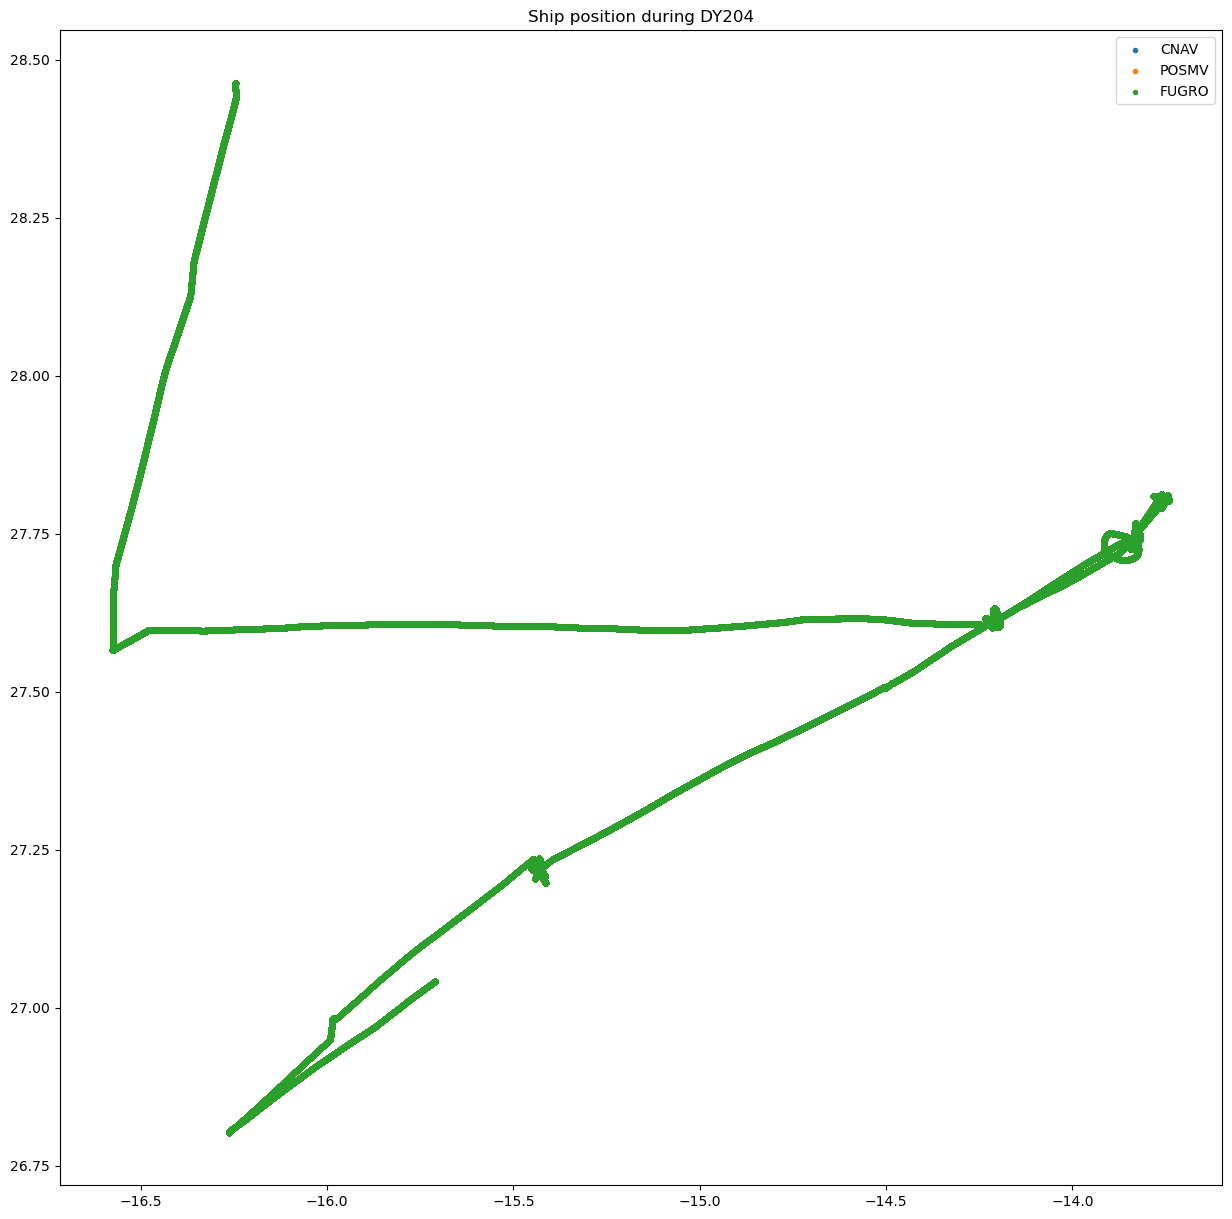

In [213]:
# Plot ship position according to the three navigation systems for the cruise duration
nt = -1
cnav_lon_init,cnav_lat_init  = dsc['longitude'][:nt],dsc['latitude'][:nt]
pnav_lon_init,pnav_lat_init  = dsp['longitude'][:nt],dsp['latitude'][:nt]
fnav_lon_init,fnav_lat_init  = dsf['longitude'][:nt],dsf['latitude'][:nt]

# Plot lat/lon comparison
fig, axs = plt.subplots(1,1, figsize=[15,15])

axs.scatter(cnav_lon_init,cnav_lat_init,marker='.', label="CNAV");
axs.scatter(pnav_lon_init,pnav_lat_init,marker='.', label="POSMV");
axs.scatter(fnav_lon_init,fnav_lat_init,marker='.', label="FUGRO");

axs.legend();

axs.set_title("Ship position during DY204");

fig.savefig(fname='cruise_position.pdf', format='pdf')
fig.savefig(fname='cruise_position.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)

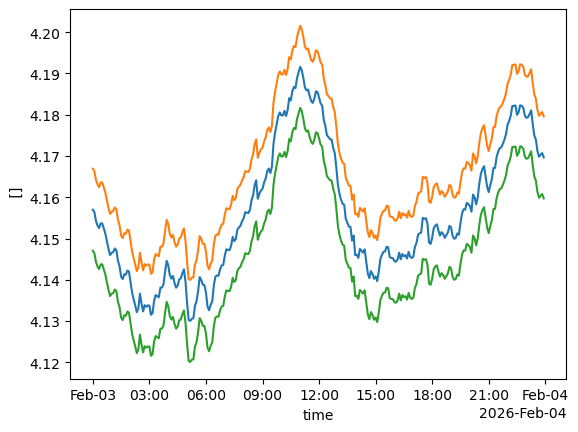

In [174]:
ds['ch2-nudammet_ndmet'].plot()
(ds['ch2-nudammet_ndmet']-ds['ch6-nudammet_ndmet'].mean()).plot()
(ds['ch2-nudammet_ndmet']+ds['ch6-nudammet_ndmet'].mean()).plot()


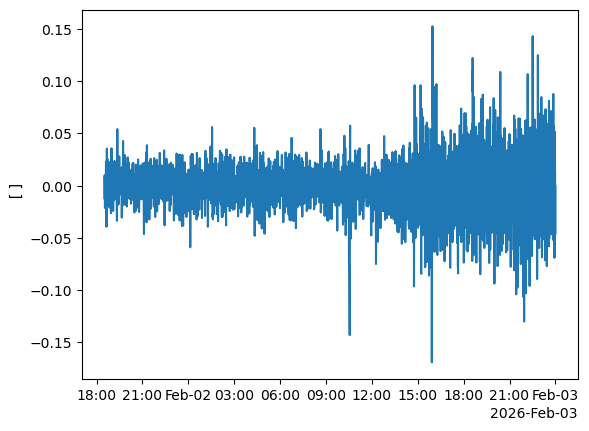

In [163]:
#(ds['roll']/10).plot(x='times')
#ds['pitch'].plot(x='times')
ds['heave'].plot(x='times')

In [53]:
dpath = '/mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/Raw/'

files = os.listdir(dpath)

dsh = xr.open_dataset(dpath+'metocean-DY204-envtemp_wimhu-raw-20260201-000000.nc')
dst = xr.open_dataset(dpath+'metocean-DY204-envtemp_wimta-raw-20260201-000000.nc')

ds = xr.merge([dsh,dst], compat='override').squeeze()

ds = ds.rename({'TIME':'time'})
ds = ds.set_coords('time')

ds

getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/Raw/metocean-DY204-envtemp_wimhu-raw-20260201-000000.nc: Operation not supported
getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/Raw/metocean-DY204-envtemp_wimta-raw-20260201-000000.nc: Operation not supported


<xarray.Dataset> Size: 474kB
Dimensions:         (MAXT: 19755)
Coordinates:
    time            (MAXT) datetime64[ns] 158kB ...
Dimensions without coordinates: MAXT
Data variables:
    trajectory      |S80 80B ...
    crs             int32 4B ...
    humidity        (MAXT) float64 158kB ...
    airtemperature  (MAXT) float64 158kB ...
Attributes: (12/32)
    start_date_time:           2026-02-01T00:00:00Z
    end_date_time:             2026-02-02T00:00:00Z
    Deployment_id:             /deployments/
    title:                     Underway observations from RRS Discovery navig...
    Conventions:               CF-1.8 SeaDataNet-1.0 ACDD-1.3 IOcean-1.0 SAMOS
    source:                    Underway observations from RRS Discovery navig...
    ...                        ...
    ID:                        2FGX5
    IMO:                       9588029
    facility:                  National Oceanography Centre, Southampton
    data_provider:             RVDAS
    contact_info:              www.noc.ac.uk
    contact_email:             nocs_nmfss_shipsys@noc.ac.uk

In [63]:
ds2 = xr.open_dataset(dpath+'metocean-DY204-nudammet_sfmet-raw-20260201-000000.nc').squeeze()

ds2 = ds2.rename({'TIME':'time'})
ds2 = ds2.set_coords('time')

getfattr: /mnt/current_cruise/Ship_Systems/Data/RVDAS/Database_NetCDF/Raw/metocean-DY204-nudammet_sfmet-raw-20260201-000000.nc: Operation not supported


In [60]:
ds2

<xarray.Dataset> Size: 1MB
Dimensions:     (MAXT: 33609)
Dimensions without coordinates: MAXT
Data variables:
    trajectory  |S80 80B ...
    crs         int32 4B ...
    TIME        (MAXT) datetime64[ns] 269kB ...
    airtemp     (MAXT) float64 269kB ...
    humidity    (MAXT) float64 269kB ...
    press       (MAXT) float64 269kB ...
Attributes: (12/32)
    start_date_time:           2026-02-01T00:00:00Z
    end_date_time:             2026-02-02T00:00:00Z
    Deployment_id:             /deployments/
    title:                     Underway observations from RRS Discovery navig...
    Conventions:               CF-1.8 SeaDataNet-1.0 ACDD-1.3 IOcean-1.0 SAMOS
    source:                    Underway observations from RRS Discovery navig...
    ...                        ...
    ID:                        2FGX5
    IMO:                       9588029
    facility:                  National Oceanography Centre, Southampton
    data_provider:             RVDAS
    contact_info:              www.noc.ac.uk
    contact_email:             nocs_nmfss_shipsys@noc.ac.uk

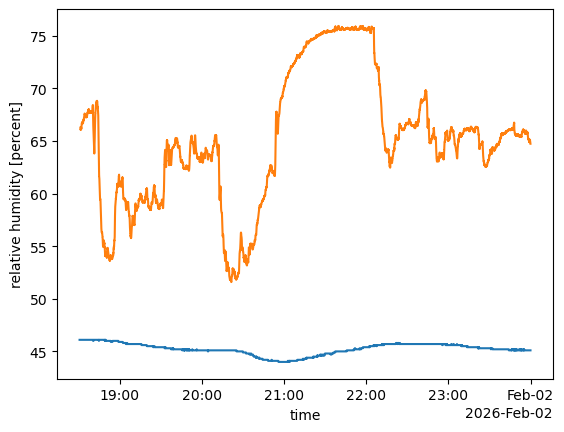

In [65]:
ds['humidity'].plot(x='time')
ds2['humidity'].plot(x='time')

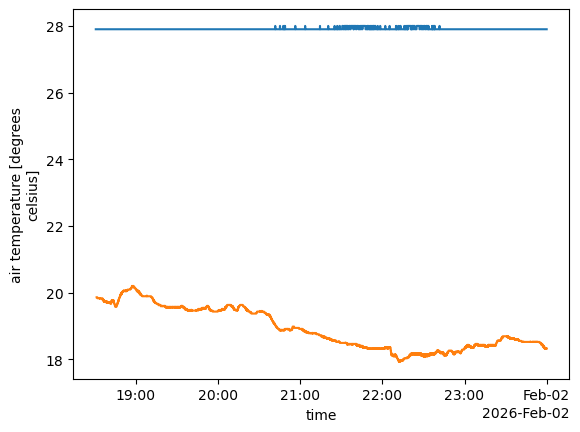

In [66]:
ds['airtemperature'].plot(x='time')
ds2['airtemp'].plot(x='time')